# Subplots

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

<IPython.core.display.Javascript object>


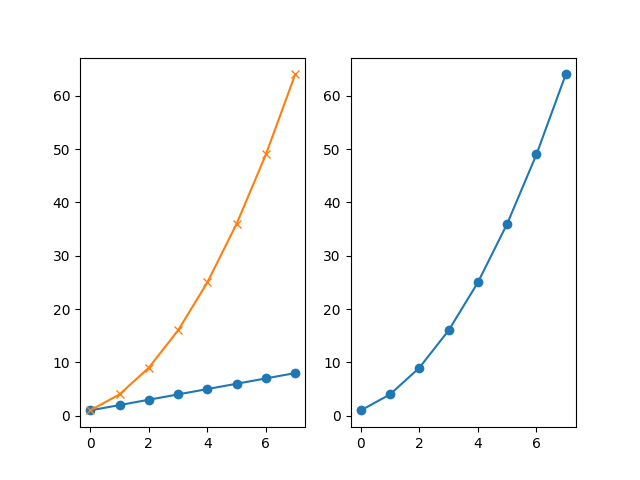

In [2]:
# let's some plots in one plot
plt.figure()
# here we initiazile a figure with two plots,
# this figure has 1 row and 2 columns, the last 
# parameter points out the plot itself
plt.subplot(1,2,1)

linear_data = np.arange(1, 9)

plt.plot(linear_data, '-o')

In [3]:
# now we plot the next one
exponential_data = linear_data ** 2

plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

In [4]:
# and we can plot another ones
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


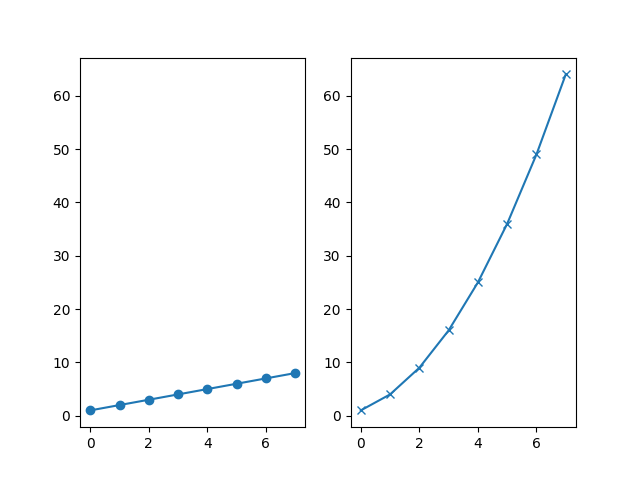

In [5]:
# we see that before we plotted the last one, both
# graphs' axis were different
# so we can solve that by making
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# here we set both graphs' y-axis are equal
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


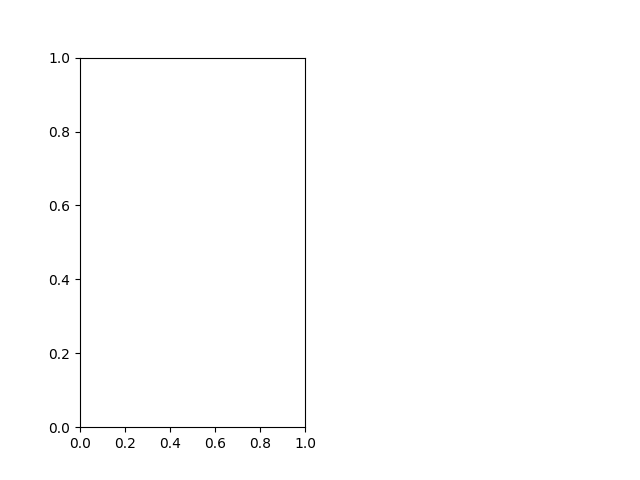

True

In [6]:
# on the othar hand, we can make the same if we do
plt.figure()
plt.subplot(1,2,1) == plt.subplot(121)

<IPython.core.display.Javascript object>


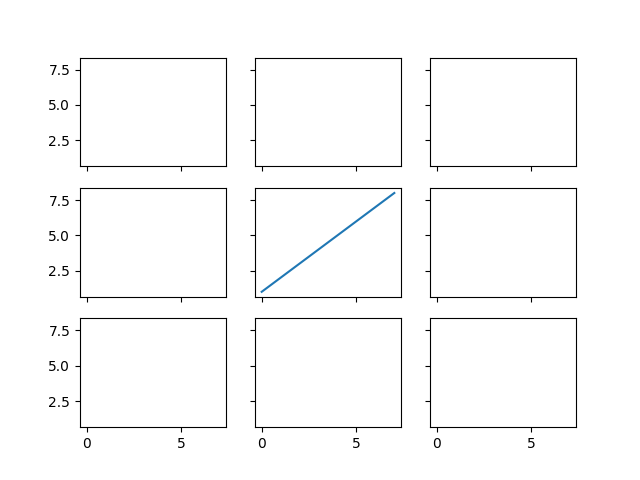

In [7]:
# Also we can create many subplots by performing
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# now we can choose one element
ax5.plot(linear_data, '-')

In [8]:
# however we see that only the left and bottom plots
# have the label, but we can solve that
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [9]:
plt.gcf().canvas.draw()

# Histograms

<IPython.core.display.Javascript object>


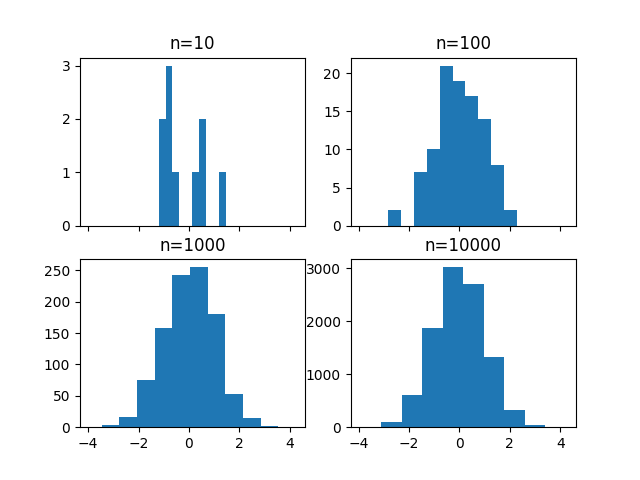

In [10]:
# first we start making some subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]
# now we gonna fill four samples using a normal distribution
for n in range(0,len(axs)):
    sample_size = 10**(n+1) # number of data we'll have
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


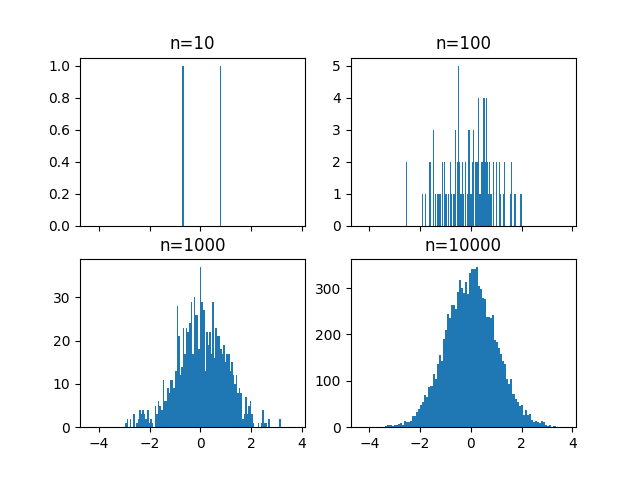

In [11]:
# we see that bars in each graph are so width, because
# python use ten bins by default, but we can change that

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1) # number of data we'll have
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


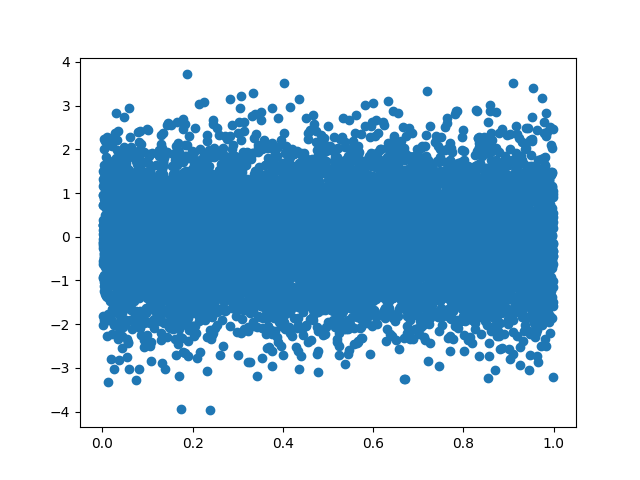

In [12]:
# let's make another tipe of histogram
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X, Y)

<IPython.core.display.Javascript object>


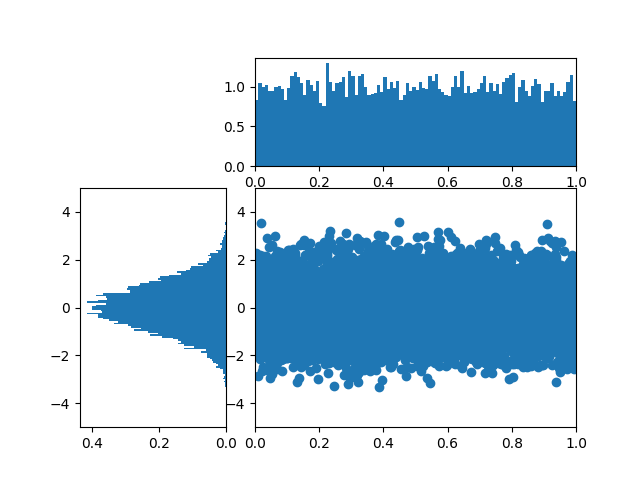

In [13]:
# there're other way to plot subplot, i.e.,
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

# plot on row 0 and column 1
top_histogram = plt.subplot(gspec[0, 1:])
# plot on row 1 and column 0
side_histogram = plt.subplot(gspec[1:, 0])
# plot on row 1 and oclumn 1
lower_right = plt.subplot(gspec[1:, 1:])
# plot on row 0 and column 0 stays in white

In [14]:
# let's fill them
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
# here's the previous histogram
lower_right.scatter(X, Y)
# here we plot the uniform histogram
top_histogram.hist(X, bins=100)
# and here the normal histogram
s = side_histogram.hist(Y, bins= 100, orientation = 'horizontal')

In [15]:
# now we have to normalize both the side_histogram's
# and the top_histogram's y-axis

# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X, bins=100, density=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', density=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

In [16]:
# and we can change the range of figures
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0,1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5,5)

In [17]:
# this histogram has the same nature as
# %%HTML
# <img src='http://educationxpress.mit.edu/sites/default/files/journal/WP1-Fig13.jpg' />

# Box Plots

In [18]:
# let's create 3 samples to work with
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

# and put these into a pandas dataframe
df = pd.DataFrame(dict(normal=normal_sample, random=random_sample, gamma=gamma_sample))

In [19]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.004286,0.501515,2.006754
std,1.001180,0.289827,1.430452
min,-3.492202,0.000116,0.015272
25%,-0.671787,0.250468,0.969588
50%,-0.010231,0.499341,1.672710
75%,0.671595,0.754465,2.702254
max,4.540467,0.999998,14.059461


<IPython.core.display.Javascript object>


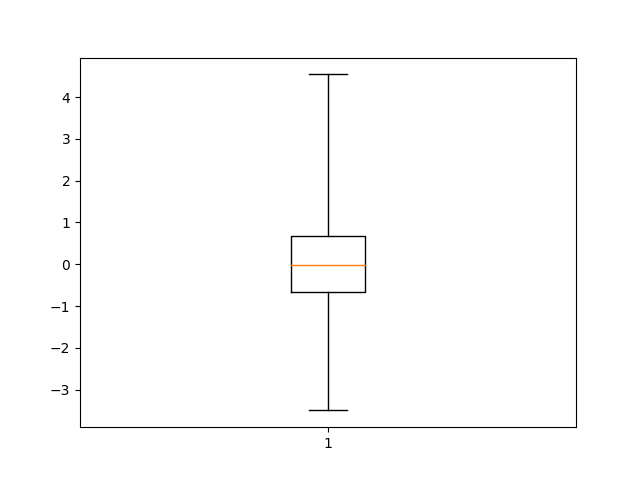

In [20]:
# so let's plot them
plt.figure()
_ = plt.boxplot(df['normal'], whis=10)

<IPython.core.display.Javascript object>


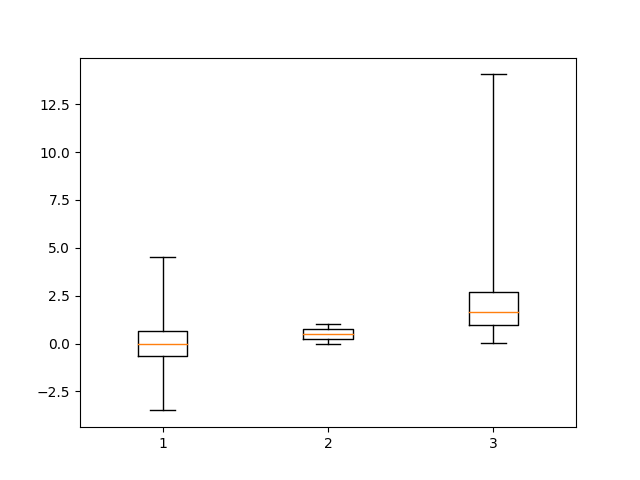

In [21]:
# and all together
plt.figure()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']], whis=10)

<IPython.core.display.Javascript object>


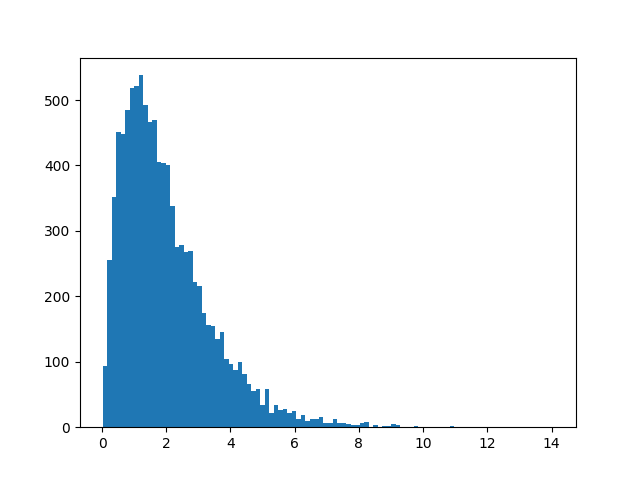

In [22]:
# and if we plot a histogram on gamma data
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

<IPython.core.display.Javascript object>


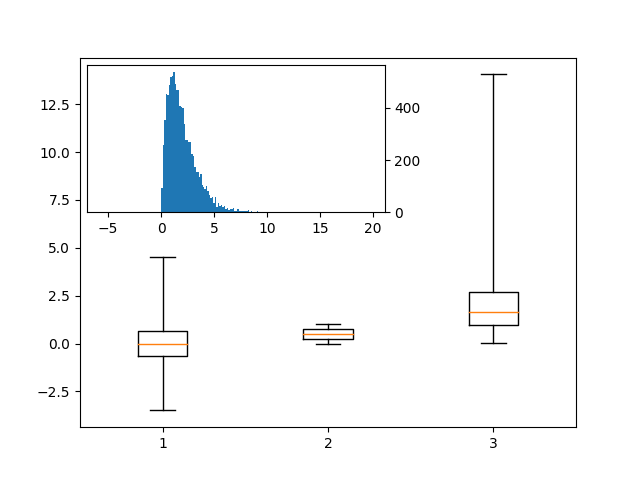

In [23]:
# Also we can introduce a plot into another one, e.g.,
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']], whis=10)
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [24]:
# and to set the y-axis
ax2.yaxis.tick_right()

# Heatmaps

<IPython.core.display.Javascript object>


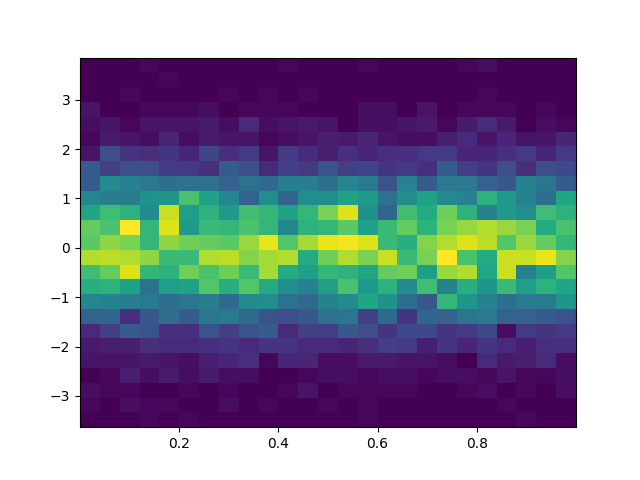

In [25]:
# let's plot that 2D histogram
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

<IPython.core.display.Javascript object>


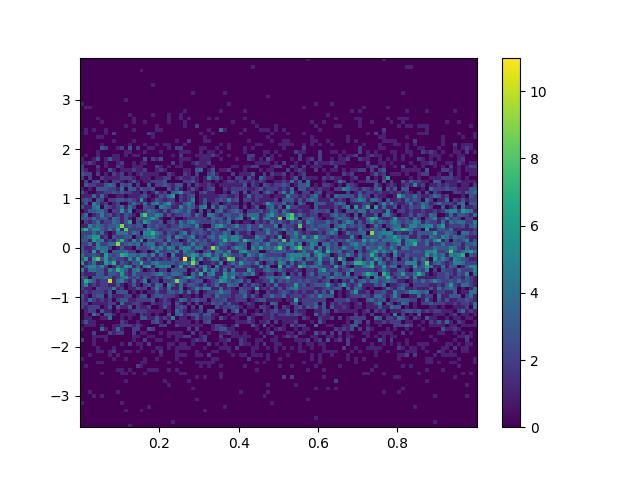

In [26]:
# now how does this graph when we use more bins chage?
plt.figure()
_ = plt.hist2d(X, Y, bins=100)

In [27]:
# so to include the heat bar o scale
plt.colorbar()

# Animation

In [29]:
import matplotlib.animation as animation
# let's create a sample
n = 100
x = np.random.randn(n)

In [30]:
# and we create a function that making animation
def update(curr):
    if curr == n: # this says when to stop
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frecuency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

<IPython.core.display.Javascript object>


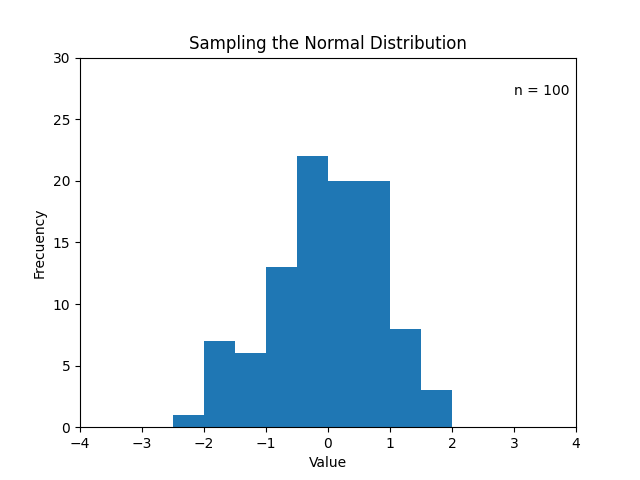

In [32]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

# Interactivity

<IPython.core.display.Javascript object>


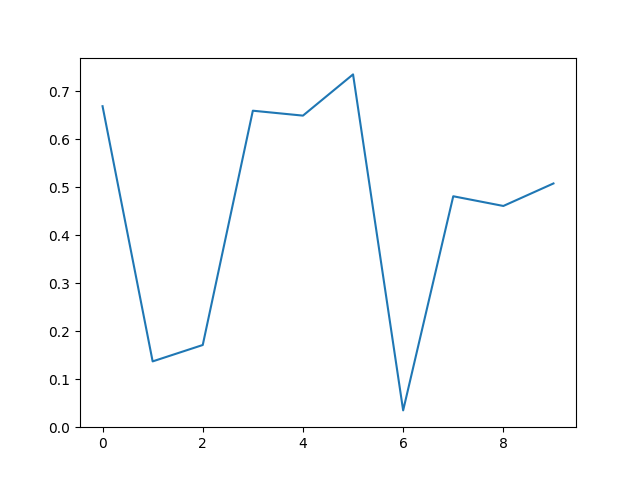

15

In [31]:
# we can make same using interactivity
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [32]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,weight,origin
0,0.502931,0.529169,USA
1,0.124028,0.213556,Iraq
2,0.071659,0.572872,Germany
3,0.408761,0.545415,Brazil
4,0.825100,0.125415,Mexico
5,0.157292,0.675379,China
6,0.151876,0.737552,Chile
7,0.313974,0.009569,India
8,0.195305,0.600026,UK
9,0.136894,0.059973,Canada


<IPython.core.display.Javascript object>


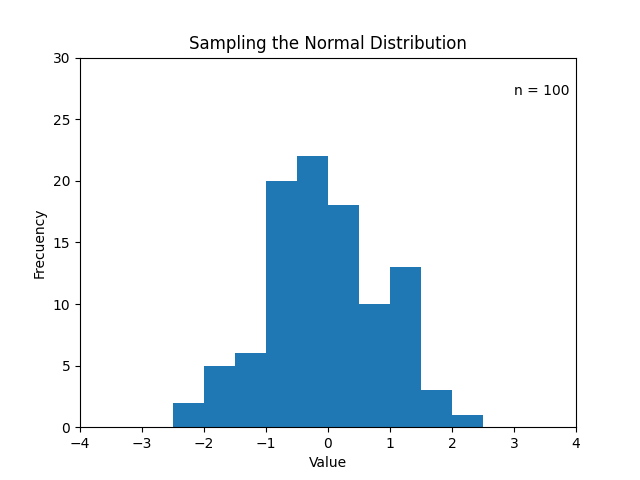

Text(0.5, 0, 'Height')

In [33]:
plt.figure()
# picker=5 means the mouse doesn't have to click 
# directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [34]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

15